In [7]:
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

#this 'magic' matplotlib command tells iPython to show any figures in this notebook, 
#rather than a separate window or saving them in separate files.
%matplotlib inline

#These commands help python remember how to format my figures so that they look nice
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

# danese 1980
Data driven astronomy-coursera

In [3]:
ra_1 ,dec_1, cz, ecz, u, g, r, u, zm, mem, dist, gl, gb = np.loadtxt('comaallzad.tab.010.q25mem.tab', skiprows=2, unpack=True)

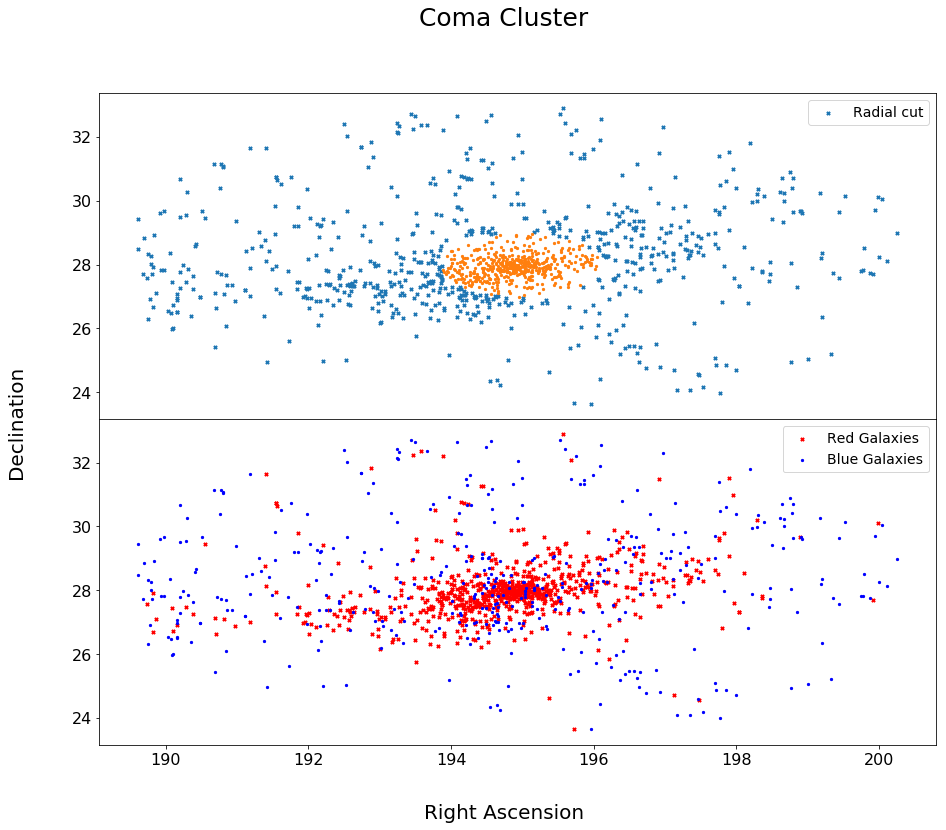

In [4]:
#a plot of the relevant cutoff members and the total cluster in the file
ff, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(15,12))

ff.subplots_adjust(hspace=0)
plt.suptitle('Coma Cluster', fontsize=25)
ff.text(0.5, 0.04, 'Right Ascension', ha='center',fontsize=20)
ff.text(0.04, 0.5, 'Declination', va='center', rotation='vertical',fontsize=20)

ax1.scatter(ra_1[dist>1],dec_1[dist>1], s=10,marker="x",label="Radial cut")
ax1.scatter(ra_1[dist<1],dec_1[dist<1], s=5)
ax1.legend()

#Red galaxies from the digram below

redSplitLine = ((.0375*r+(g-r)))
tbool = redSplitLine>1.225

ax2.scatter(ra_1[tbool],dec_1[tbool], s=10,c='r',marker='x',label='Red Galaxies')
ax2.scatter(ra_1[np.logical_not(tbool)],dec_1[np.logical_not(tbool)], s=5,c='b',label='Blue Galaxies')
ax2.legend()

(12.5, 18)

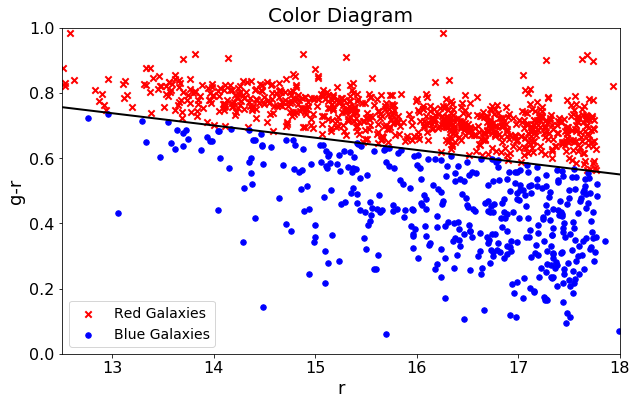

In [5]:
plt.plot([12,18],[.775,.55],'k')
plt.scatter(r[tbool],g[tbool]-r[tbool],s=40,c='r', marker="x",label="Red Galaxies")
plt.scatter(r[np.logical_not(tbool)],g[np.logical_not(tbool)]-r[np.logical_not(tbool)],s=30,c='b',label="Blue Galaxies")


plt.xlabel("r")
plt.ylabel("g-r")
plt.title("Color Diagram")
plt.legend()
plt.ylim(0,1)
plt.xlim(12.5,18)

Text(0.5,1,'Distribution of absolute redshift Split into 5 bins')

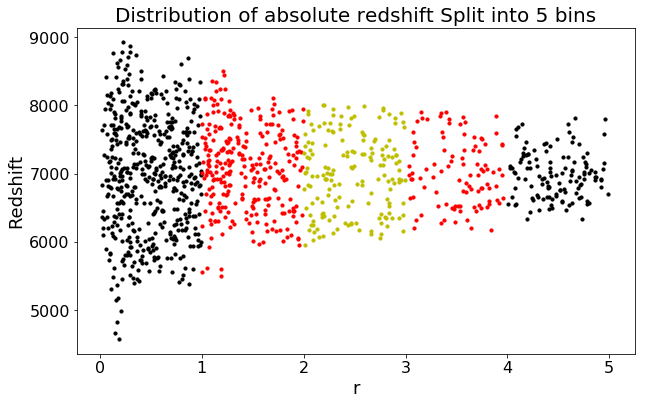

In [6]:
plt.scatter(dist[dist<1],cz[dist<1],c="k",s=10)
plt.scatter(dist[np.logical_and(dist>1,dist<2)],cz[np.logical_and(dist>1,dist<2)],c="r",s=10)
plt.scatter(dist[np.logical_and(dist>2,dist<3)],cz[np.logical_and(dist>2,dist<3)],c="y",s=10)
plt.scatter(dist[np.logical_and(dist>3,dist<4)],cz[np.logical_and(dist>3,dist<4)],c="r",s=10)
plt.scatter(dist[dist>4],cz[dist>4],c="k",s=10)

plt.xlabel("r")
plt.ylabel("Redshift")
plt.title("Distribution of absolute redshift Split into 5 bins")

Text(0,0.5,'Rest frame velocity')

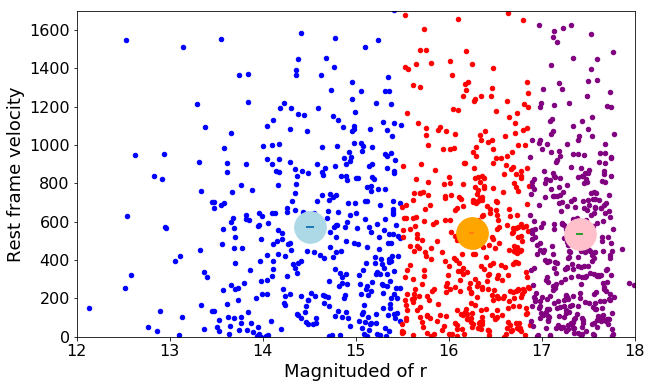

In [7]:
magnitudeindex = np.argsort(r)
totalAverage = np.average(cz)
comaVRF=abs((cz-totalAverage))

plt.scatter(r[magnitudeindex[:400]],comaVRF[magnitudeindex[:400]],s=20,c='b')
plt.scatter(r[magnitudeindex[400:800]],comaVRF[magnitudeindex[400:800]],s=20,c='r')
plt.scatter(r[magnitudeindex[800:]],comaVRF[magnitudeindex[800:]],s=20,c='purple')
plt.scatter(np.average(r[magnitudeindex[:400]]),np.average(comaVRF[magnitudeindex[:400]]),s=1000,c='lightblue')
plt.scatter(np.average(r[magnitudeindex[400:800]]),np.average(comaVRF[magnitudeindex[400:800]]),s=1000,c='orange')
plt.scatter(np.average(r[magnitudeindex[800:]]),np.average(comaVRF[magnitudeindex[800:]]),s=1000,c='pink')

xerr1=np.sqrt(np.std(r[magnitudeindex[:400]])/len(magnitudeindex[:400]))
yerr1=np.sqrt(np.std(comaVRF[magnitudeindex[:400]])/len(magnitudeindex[:400]))
xerr2=np.sqrt(np.std(r[magnitudeindex[400:800]])/len(magnitudeindex[400:800]))
yerr2=np.sqrt(np.std(comaVRF[magnitudeindex[400:800]])/len(magnitudeindex[400:800]))
xerr3=np.sqrt(np.std(r[magnitudeindex[800:]])/len(magnitudeindex[800:]))
yerr3=np.sqrt(np.std(comaVRF[magnitudeindex[800:]])/len(magnitudeindex[800:]))

plt.errorbar(np.average(r[magnitudeindex[:400]]),np.average(comaVRF[magnitudeindex[:400]]),xerr= xerr1,yerr=yerr1)
plt.errorbar(np.average(r[magnitudeindex[400:800]]),np.average(comaVRF[magnitudeindex[400:800]]),xerr= xerr2,yerr=yerr2)
plt.errorbar(np.average(r[magnitudeindex[800:]]),np.average(comaVRF[magnitudeindex[800:]]),xerr= xerr3,yerr=yerr3)

plt.ylim(0,1700)
plt.xlim(12,18)
plt.xlabel("Magnituded of r")
plt.ylabel("Rest frame velocity")

0.0359618003573


Text(0,0.5,'Rest frame velocity')

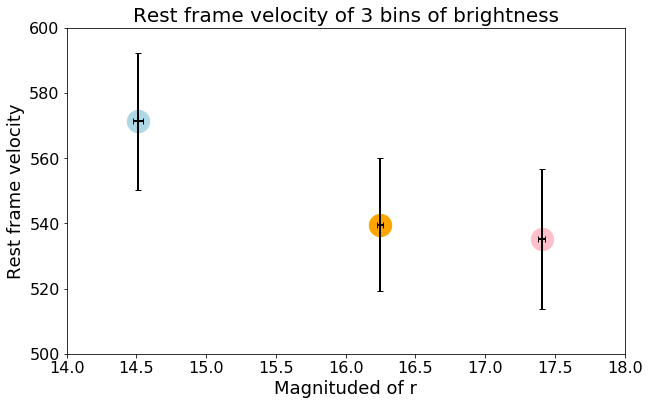

In [8]:
plt.scatter(np.average(r[magnitudeindex[:400]]),np.average(comaVRF[magnitudeindex[:400]]),s=500,c='lightblue')
plt.scatter(np.average(r[magnitudeindex[400:800]]),np.average(comaVRF[magnitudeindex[400:800]]),s=500,c='orange')
plt.scatter(np.average(r[magnitudeindex[800:]]),np.average(comaVRF[magnitudeindex[800:]]),s=500,c='pink')

xerr1=np.std(r[magnitudeindex[:400]])/np.sqrt(len(magnitudeindex[:400]))
yerr1=np.std(comaVRF[magnitudeindex[:400]])/np.sqrt(len(magnitudeindex[:400]))
xerr2=np.std(r[magnitudeindex[400:800]])/np.sqrt(len(magnitudeindex[400:800]))
yerr2=np.std(comaVRF[magnitudeindex[400:800]])/np.sqrt(len(magnitudeindex[400:800]))
xerr3=np.std(r[magnitudeindex[800:]])/np.sqrt(len(magnitudeindex[800:]))
yerr3=np.std(comaVRF[magnitudeindex[800:]])/np.sqrt(len(magnitudeindex[800:]))

print(xerr1)

plt.errorbar(np.average(r[magnitudeindex[:400]]),np.average(comaVRF[magnitudeindex[:400]]),xerr= xerr1,yerr=yerr1,capsize=3,c='k')
plt.errorbar(np.average(r[magnitudeindex[400:800]]),np.average(comaVRF[magnitudeindex[400:800]]),xerr= xerr2,yerr=yerr2,capsize=3,c='k')
plt.errorbar(np.average(r[magnitudeindex[800:]]),np.average(comaVRF[magnitudeindex[800:]]),xerr= xerr3,yerr=yerr3,capsize=3,c='k')

plt.ylim(500,600)
plt.xlim(14,18)
plt.title("Rest frame velocity of 3 bins of brightness")
plt.xlabel("Magnituded of r")
plt.ylabel("Rest frame velocity")

Text(0,0.5,'Average V$_{rf}$ of bin')

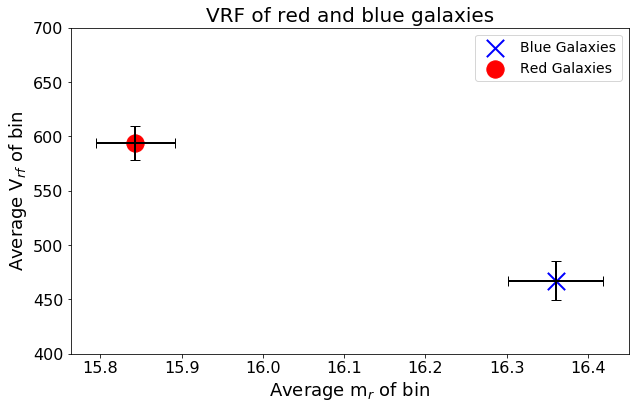

In [9]:
## plotting the average r-value of the bin, binned above line plotted above
##not sure if x-axis being what it is is good?
redvrf=np.average(comaVRF[tbool])
bluevrf= np.average(comaVRF[np.logical_not(tbool)])
averageRvrf=np.average(r[tbool])
averageBvrf=np.average(r[np.logical_not(tbool)])

#plt.scatter([averageRvrf,averageBvrf],[redvrf,bluevrf],c=['b','r'],marker='x' ,s=300)
plt.scatter(averageBvrf,bluevrf,c='b',marker='x',label='Blue Galaxies' ,s=300)
plt.scatter(averageRvrf,redvrf,c='r',label='Red Galaxies' ,s=300)

rerrY=np.std(comaVRF[tbool])/np.sqrt(sum(tbool)) 
rerrX=np.std(r[tbool])/np.sqrt(sum(tbool)) 
berrY=np.std(comaVRF[np.logical_not(tbool)])/np.sqrt(sum(np.logical_not(tbool)))
berrX=np.std(r[np.logical_not(tbool)])/np.sqrt(sum(np.logical_not(tbool)))
plt.errorbar(averageRvrf,redvrf,xerr=rerrX,yerr=rerrY,capsize=5,c='k')
plt.errorbar(averageBvrf,bluevrf,xerr=berrX,yerr=berrY,capsize=5,c='k')


plt.legend()
plt.ylim(400,700)
plt.title("VRF of red and blue galaxies")
plt.xlabel("Average m$_r$ of bin")
plt.ylabel("Average V$_{rf}$ of bin")

In [10]:
sum(np.logical_and(np.logical_not(tbool),dist<1))

69

Text(0,0.5,'Average V$_{rf}$ of bin')

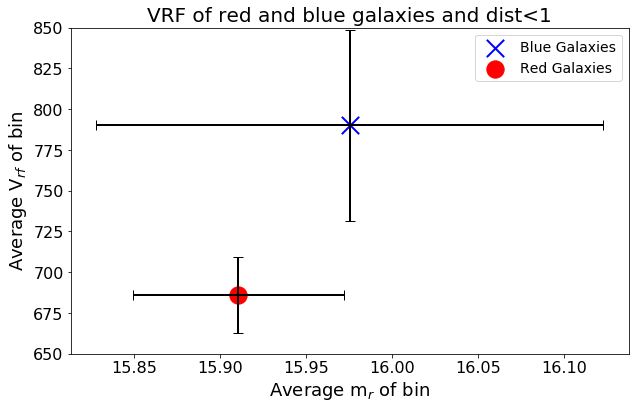

In [11]:
## plotting the average r-value of the bin, binned above line plotted above
##not sure if x-axis being what it is is good?
redvrfD=np.average(comaVRF[np.logical_and(tbool,dist<1)])
bluevrfD= np.average(comaVRF[np.logical_and(np.logical_not(tbool),dist<1)])
averageRvrfD=np.average(r[np.logical_and(tbool,dist<1)])
averageBvrfD=np.average(r[np.logical_and(np.logical_not(tbool),dist<1)])

#plt.scatter([averageRvrf,averageBvrf],[redvrf,bluevrf],c=['b','r'],marker='x' ,s=300)
plt.scatter(averageBvrfD,bluevrfD,c='b',marker='x',label='Blue Galaxies' ,s=300)
plt.scatter(averageRvrfD,redvrfD,c='r',label='Red Galaxies' ,s=300)

rerrYD=np.std(comaVRF[np.logical_and(tbool,dist<1)])/np.sqrt(sum(np.logical_and(tbool,dist<1))) 
rerrXD=np.std(r[np.logical_and(tbool,dist<1)])/np.sqrt(sum(np.logical_and(tbool,dist<1))) 
berrYD=np.std(comaVRF[np.logical_and(np.logical_not(tbool),dist<1)])/np.sqrt(sum(np.logical_and(np.logical_not(tbool),dist<1)))
berrXD=np.std(r[np.logical_and(np.logical_not(tbool),dist<1)])/np.sqrt(sum(np.logical_and(np.logical_not(tbool),dist<1)))
plt.errorbar(averageRvrfD,redvrfD,xerr=rerrXD,yerr=rerrYD,capsize=5,c='k')
plt.errorbar(averageBvrfD,bluevrfD,xerr=berrXD,yerr=berrYD,capsize=5,c='k')

rerrYD=np.average(ecz[np.logical_and(tbool,dist<1)])/np.sqrt(sum(np.logical_and(tbool,dist<1)))
rerrYD=np.average(ecz[np.logical_and(np.logical_not(tbool),dist<1)])/np.sqrt(sum(np.logical_and(np.logical_not(tbool),dist<1)))

plt.legend()
plt.ylim(650,850)
plt.title("VRF of red and blue galaxies and dist<1")
plt.xlabel("Average m$_r$ of bin")
plt.ylabel("Average V$_{rf}$ of bin")

Text(0,0.5,'Rest frame velocity')

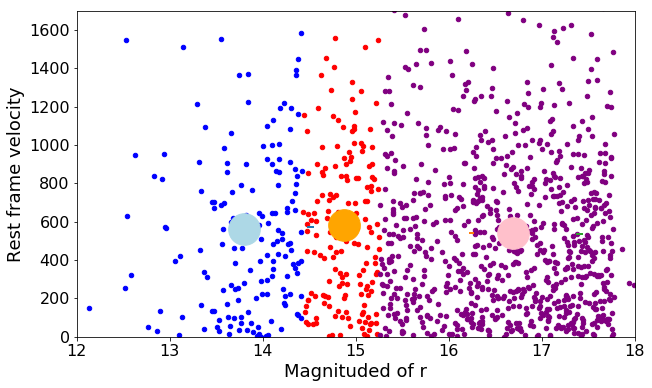

In [12]:
magnitudeindexD = np.argsort(r[dist<1])
totalAverageD = np.average(cz[dist<1])
comaVRFD=abs(cz[dist<1]-totalAverage)

plt.scatter(r[magnitudeindex[:166]],comaVRF[magnitudeindex[:166]],s=20,c='b')
plt.scatter(r[magnitudeindex[166:333]],comaVRF[magnitudeindex[166:333]],s=20,c='r')
plt.scatter(r[magnitudeindex[333:]],comaVRF[magnitudeindex[333:]],s=20,c='purple')
plt.scatter(np.average(r[magnitudeindex[:166]]),np.average(comaVRF[magnitudeindex[:166]]),s=1000,c='lightblue')
plt.scatter(np.average(r[magnitudeindex[166:333]]),np.average(comaVRF[magnitudeindex[166:333]]),s=1000,c='orange')
plt.scatter(np.average(r[magnitudeindex[333:]]),np.average(comaVRF[magnitudeindex[333:]]),s=1000,c='pink')

xerr1=np.sqrt(np.std(r[magnitudeindex[:166]])/len(magnitudeindex[:400]))
yerr1=np.sqrt(np.std(comaVRF[magnitudeindex[:400]])/len(magnitudeindex[:400]))
xerr2=np.sqrt(np.std(r[magnitudeindex[400:800]])/len(magnitudeindex[400:800]))
yerr2=np.sqrt(np.std(comaVRF[magnitudeindex[400:800]])/len(magnitudeindex[400:800]))
xerr3=np.sqrt(np.std(r[magnitudeindex[800:]])/len(magnitudeindex[800:]))
yerr3=np.sqrt(np.std(comaVRF[magnitudeindex[800:]])/len(magnitudeindex[800:]))

plt.errorbar(np.average(r[magnitudeindex[:400]]),np.average(comaVRF[magnitudeindex[:400]]),xerr= xerr1,yerr=yerr1)
plt.errorbar(np.average(r[magnitudeindex[400:800]]),np.average(comaVRF[magnitudeindex[400:800]]),xerr= xerr2,yerr=yerr2)
plt.errorbar(np.average(r[magnitudeindex[800:]]),np.average(comaVRF[magnitudeindex[800:]]),xerr= xerr3,yerr=yerr3)

plt.ylim(0,1700)
plt.xlim(12,18)
plt.xlabel("Magnituded of r")
plt.ylabel("Rest frame velocity")

Text(0.5,1,'Rest frame velocity of Galaxies by brightness (R<1)')

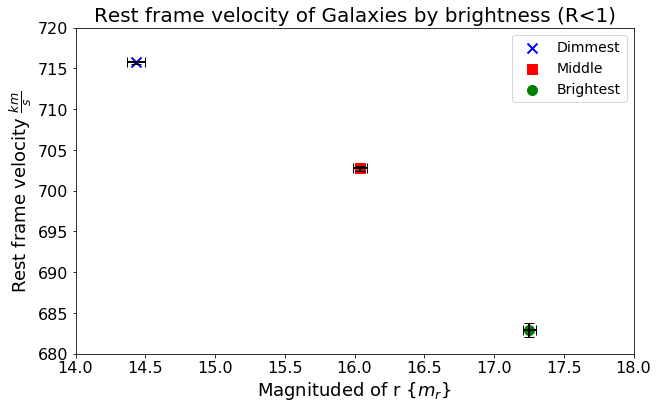

In [13]:
magnitudeindexD = np.argsort(r[dist<1])
totalAverageD = np.average(cz[dist<1])
comaVRFD=abs(cz[dist<1]-totalAverage)

plt.scatter(np.average(r[magnitudeindexD[:166]]),np.average(comaVRFD[magnitudeindexD[:166]]),s=100,c='blue',marker='x',label="Dimmest")
plt.scatter(np.average(r[magnitudeindexD[166:333]]),np.average(comaVRFD[magnitudeindexD[166:333]]),s=100,c='red',marker='s',label='Middle')
plt.scatter(np.average(r[magnitudeindexD[333:]]),np.average(comaVRFD[magnitudeindexD[333:]]),s=100,c='green',marker='o',label='Brightest')

xerr1=np.sqrt(np.std(r[magnitudeindexD[:166]])/len(magnitudeindexD[:166]))
yerr1=np.average(ecz[magnitudeindexD[:166]])/np.sqrt(len(magnitudeindexD[:166]))
xerr2=np.sqrt(np.std(r[magnitudeindexD[166:333]])/len(magnitudeindexD[166:333]))
yerr2=np.average(ecz[magnitudeindexD[166:333]])/np.sqrt(len(magnitudeindexD[166:333]))
xerr3=np.sqrt(np.std(r[magnitudeindexD[333:]])/len(magnitudeindexD[333:]))
yerr3=np.average(ecz[magnitudeindexD[333:]])/np.sqrt(len(magnitudeindexD[333:]))

plt.errorbar(np.average(r[magnitudeindexD[:166]]),np.average(comaVRFD[magnitudeindexD[:166]]),xerr= xerr1,yerr=yerr1,capsize=5,c='k')
plt.errorbar(np.average(r[magnitudeindexD[166:333]]),np.average(comaVRFD[magnitudeindexD[166:333]]),xerr= xerr2,yerr=yerr2,capsize=5,c='k')
plt.errorbar(np.average(r[magnitudeindexD[333:]]),np.average(comaVRFD[magnitudeindexD[333:]]),xerr= xerr3,yerr=yerr3,capsize=5,c='k')

plt.legend()
plt.ylim(680,720)
plt.xlim(14,18)
plt.xlabel(r"Magnituded of r {$m_r$}")
plt.ylabel(r"Rest frame velocity $\frac{km}{s}$")
plt.title("Rest frame velocity of Galaxies by brightness (R<1)")

In [15]:
c=3*10**5
df=(len(magnitudeindexD)-1)
vbar= np.average(cz[magnitudeindexD])
eczbar=np.average(ecz[magnitudeindexD])

vel1= (cz[magnitudeindexD]- vbar)/(1+vbar/c)
velDis= sum(vel1**2/df) - (eczbar**2/(1+vbar/c)**2 )

In [16]:
np.sqrt(velDis)

832.17479034150892

In [21]:
#confidence level
interval= stats.chi2.interval(.68,df)
deltastar2= (np.average(eczbar))**2 /(1+vbar/c)**2

errBars=[]
errBars.append(np.sqrt((np.sqrt(df/interval[1])-1)**2 *velDis + deltastar2*(1+deltastar2/(2*velDis))/(df+1)))
errBars.append(np.sqrt((np.sqrt(df/interval[0])-1)**2 *velDis + deltastar2*(1+deltastar2/(2*velDis))/(df+1)))


print(errBars)

[24.928988852253102, 27.403967187567194]


<Container object of 3 artists>

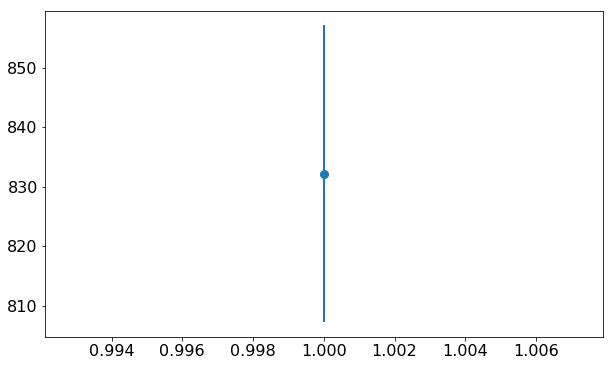

In [30]:
plt.scatter(1,np.sqrt(velDis))
plt.errorbar(1,np.sqrt(velDis),yerr=[errBars])